In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## To load the data

In [2]:
stbk=pd.read_csv("bank-full.csv",sep=';')
stbk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [3]:
stbk[stbk.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


#### There are no duplicate values

## To find null values

In [4]:
stbk.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There are no null values

## To find Outliers of each columns

### Outliers of job

In [5]:
stbk['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
stbk['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

#### The rows names of 'default' are in 'yes' or 'no' type. So have to change into binary (0,1)

In [7]:
stbk['default'][stbk['default']=='no']=0
stbk['default'][stbk['default']=='yes']=1
stbk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
stbk['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [9]:
stbk['balance'].value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

<AxesSubplot:>

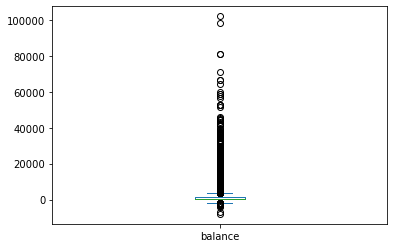

In [10]:
stbk['balance'].plot(kind='box')

In [11]:
stbk['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

#### Change ('yes' or 'no') to binary(0,1)

In [12]:
stbk['housing'][stbk['housing']=='no']=0
stbk['housing'][stbk['housing']=='yes']=1
stbk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
stbk['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

#### change to binary


In [14]:
stbk['loan'][stbk['loan']=='no']=0
stbk['loan'][stbk['loan']=='yes']=1
stbk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
stbk['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

#### Change to binary

In [16]:
stbk['y'][stbk['y']=='no']=0
stbk['y'][stbk['y']=='yes']=1
stbk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [17]:
stbk['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

### The month list are in alphabet. So have to change the month into corresponding numerical number.


In [18]:
stbk['month'][stbk['month']=='jan']=1
stbk['month'][stbk['month']=='feb']=2
stbk['month'][stbk['month']=='mar']=3
stbk['month'][stbk['month']=='apr']=4
stbk['month'][stbk['month']=='may']=5
stbk['month'][stbk['month']=='jun']=6
stbk['month'][stbk['month']=='jul']=7
stbk['month'][stbk['month']=='aug']=8
stbk['month'][stbk['month']=='sep']=9
stbk['month'][stbk['month']=='oct']=10
stbk['month'][stbk['month']=='nov']=11
stbk['month'][stbk['month']=='dec']=12

In [19]:
stbk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


In [20]:
# change the name poutcome to outcome
stbk=stbk.rename({'poutcome':'outcome'},axis=1)
stbk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


In [21]:
x=stbk.iloc[:,:-1]
y=stbk.iloc[:,-1]

In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: object

In [23]:
x=pd.get_dummies(columns=['education','job','marital','contact','outcome'],data=x)

In [24]:
x

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,1,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,0,1,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,1,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,1,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,0,1,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,0,1,0,0,1,0,0,0,0,1


In [25]:
x=x.astype({'default':int,'housing':int,'loan':int})
y=y.astype(int)

### Splitting data into train and test data

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

## Building Model

In [28]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
ac=accuracy_score(y_pred,y_test)
ac

0.8966051089240297

In [29]:
classifier.coef_

array([[ 1.65119229e-02, -2.08408688e-02,  5.77777578e-02,
        -4.02124383e-01, -2.13518283e-01, -4.15646818e-02,
        -4.80651092e-02,  1.05994866e+00, -3.28117076e-01,
         1.10994149e-02,  2.25115352e-02, -7.98959219e-02,
        -1.92122448e-02,  8.06514498e-02,  7.24541169e-03,
         7.12922338e-02, -6.76268390e-02, -5.70987335e-02,
        -5.57680040e-02, -4.72239051e-03,  1.23019134e-01,
        -1.30229189e-02, -3.22455567e-02,  9.78959579e-02,
        -1.29590848e-02,  1.38255199e-02, -3.27777350e-03,
         1.63650318e-02, -8.26556195e-02,  7.81796724e-02,
         2.59103661e-01,  1.03260647e-01, -3.29987111e-01,
        -4.72653280e-02,  7.78144991e-04,  3.91776730e-01,
        -1.43046244e-01]])

## Classification report for test data

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.61      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043



## Classfication report for train data

In [31]:
print(classification_report(y_train,classifier.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31942
           1       0.65      0.33      0.44      4226

    accuracy                           0.90     36168
   macro avg       0.78      0.65      0.69     36168
weighted avg       0.89      0.90      0.89     36168



## Confusion matrix

In [32]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[7760  220]
 [ 715  348]]


0.6524257555318779


Text(0, 0.5, 'True Positive Rate / Sensitivity')

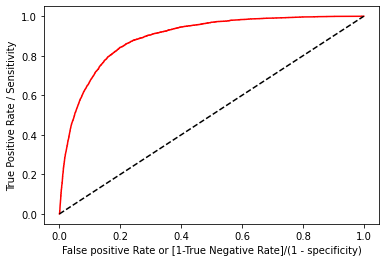

In [33]:
fpr,tpr,thresholds = roc_curve(y_train,classifier.predict_proba(x_train)[:,1])

auc = roc_auc_score(y_train,classifier.predict(x_train))
print(auc)

plt.plot(fpr,tpr,color='red',label='logit model( area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive Rate or [1-True Negative Rate]/(1 - specificity)')
plt.ylabel('True Positive Rate / Sensitivity')

## Since pdays doesn't scale linearly so changing -1 values to some large values

In [34]:
X2=x.copy()
X2.pdays[X2.pdays==1]=2000

In [41]:
x_train2,x_test2,y_train2,y_test2=train_test_split(X2,y, test_size=0.2,random_state=0)

## Creating a new model with the modified dataset

In [44]:
x_train2=StandardScaler().fit_transform(x_train2)
x_test2=StandardScaler().fit_transform(x_test2)
classifier2=LogisticRegression()
classifier2.fit(x_train2,y_train2)
y_pred2=classifier2.predict(x_test2)
ac2=accuracy_score(y_pred2,y_test2)
ac2

0.8966051089240297

## Classification reports

In [45]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.61      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [46]:
print(classification_report(y_train2,classifier.predict(x_train2)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31942
           1       0.65      0.33      0.44      4226

    accuracy                           0.90     36168
   macro avg       0.78      0.65      0.69     36168
weighted avg       0.89      0.90      0.89     36168



In [47]:
cm2=confusion_matrix(y_test2,y_pred2)
print(cm2)

[[7760  220]
 [ 715  348]]


0.6526623859152191


Text(0, 0.5, 'True Positive Rate / Sensitivity')

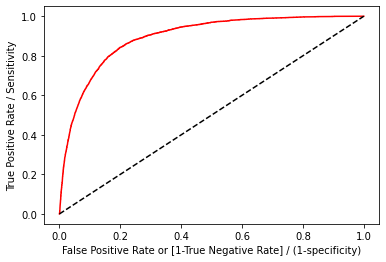

In [48]:
fpr,tpr,thresholds = roc_curve(y_train2,classifier.predict_proba(x_train2)[:,1])

auc2=roc_auc_score(y_train2,classifier.predict(x_train2))
print(auc2)

plt.plot(fpr,tpr,color='red',label='logic model(area =%0.2f)'%auc2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate] / (1-specificity)')
plt.ylabel('True Positive Rate / Sensitivity')

## New model is slightly better when predicting zeroes

In [51]:
classifier_final=classifier2